## Caso de negocio: Apoyo al Departamento de Marketing para enviar campañas segmentadas a los clientes.

El marketing desempeña un papel fundamental en el crecimiento y la sostenibilidad de cualquier negocio. Para tener un marketing efectivo, es crucial realizar campañas personalizadas que comprendan las necesidades de nuestros clientes. Esto es fundamental para fortalecer la imagen de la compañía, retener clientes existentes, atraer nuevos clientes, aumentar las ventas y, en última instancia, mejorar el rendimiento de la empresa.

En este contexto, en este caso de estudio el Departamento de Marketing de nuestra empresa nos requiere para enviar campañas segmentadas a los clientes. El objetivo es **utilizar la información y los datos disponibles** para identificar diferentes grupos de clientes con características y necesidades similares. **Debemos segmentarlos en al menos, 3 grupos distintivos** Al segmentarlos, podemos adaptar las estrategias y mensajes de marketing de manera más efectiva, brindando una experiencia personalizada que resuene con cada segmento.

**El análisis implicará el analisis de datos de los ultimos 6 meses** de los utilizando ténicas de análisis de datos y clustering para identificar los grupos y patrones relevantes. Esto permitirá la creación de segmentos de clientes significativos, lo que nos brindará información valiosa para desarrollar campañas más precisas y efectivas.

Esto acompañado de la posterior automatización y seguimiento de campañas segmentadas, nos permitirá implementar estrategias específicas para cada grupo de clientes, realizar un seguimiento de su rendimiento y ajustar nuestras acciones según los resultados obtenidos.

![marketing](media/img1.png)

Dataset de Kaggle: https://www.kaggle.com/arjunbhasin2013/ccdata

### Librerias y dataset.

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Leemos el dataset de los registros de tarjetas de credito 

df = pd.read_csv('data/cc_data.csv')


Data: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata/download?datasetVersionNumber=1

- **custid**: Identificación del titular de la tarjeta de crédito.
- **balance**: Saldo restante en la cuenta del cliente.
- **balance_frequency**: Con qué frecuencia se actualiza el saldo (0-1, 1 = actualiza con frecuencia, 0 = no se actualiza con frecuencia).
- **purchases**: Monto de las compras realizadas desde la cuenta.
- **oneoffpurchases**: Monto máximo de compra unica o esporadica.
- **installments_purchases**: Monto de compras realizadas en cuotas.
- **cash_advance**: Adelantos de efectivo solicitados.
- **purchases_frequency**: Frecuencia de las compras (0 - 1, 1 = compras frecuentes, 0 = compras no frecuentes).
- **oneoff_purchases_frequency**: Frecuencia de compras de una sola vez (0-1, 1 = compras frecuentes, 0 = compras no frecuentes).
- **purchases_installments_frequency**: Frecuencia de compras a plazos (0-1, 1 = frecuentemente, 0 = no frecuentemente).
- **cash_advance_frequency**: Frecuencia de pago de adelanto de efectivo.
- **cash_advance_trx**: Número de transacciones realizadas con "Cash in Advance" (efectivo por adelantado).
- **purchases_trx**: Número de transacciones de compra.
- **credit_limit**: Límite de la tarjeta de crédito.
- **payments**: Monto de pagos realizados.
- **minimum_payments**: Cantidad mínima de pagos realizados.
- **prc_full_payment**: Porcentaje de pago completo realizado.
- **tenure**: Duración del servicio de la tarjeta de crédito.

## EDA y limpieza.

In [3]:
df.shape

(8950, 18)

In [4]:
df.info()
# 18 caracteristicas y 8950 puntos de datos. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Procesamiento de datos, busqueda de valores faltantes y visualizacion.


# Visualización y exploración del dataset.

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Manejo de los valores nulos**

Tenemos 313 valores nulos en la columna "MINIMUM_PAYMENTS", hay varias opciones que podemos considerar para manejar esos valores faltantes:

Eliminarlos: Si los valores nulos representan una proporción muy pequeña de tu conjunto de datos, podría optar por eliminarlos

    df.dropna(subset=['MINIMUM_PAYMENTS'], inplace=True)


Imputar los datos: Si los valores nulos representan una proporción significativa de los datos, puedes optar por utilizar alguna técnica de imputación que simplemente quiere decir agregarle datos. Algunas opciones son reemplazar los valores nulos con la media, la mediana o algún otro valor estadístico relevante para esos datos.


    mean_value = df['MINIMUM_PAYMENTS'].mean()
    df['MINIMUM_PAYMENTS'].fillna(mean_value, inplace=True)

Imputación más avanzada: En lugar de imputar los valores faltantes utilizando resumenes de estadisticas, podemos utilizar modelos como K-Nearest Neighbors (K-NN), regresión lineal, regresión múltiple,  para estimar los valores faltantes en función de otras características disponibles en tus datos.
    
    from sklearn.impute import KNNImputer

    imputer = KNNImputer(n_neighbors=5)
    df['MINIMUM_PAYMENTS'] = imputer.fit_transform(df[['MINIMUM_PAYMENTS']])

<Axes: >

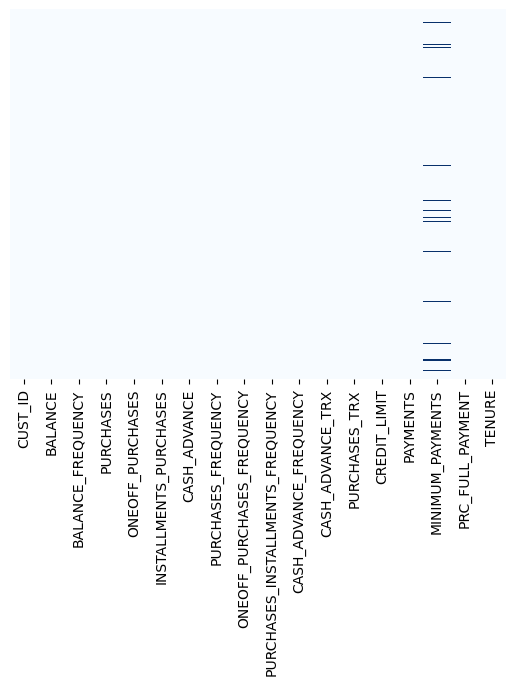

In [7]:
# Visual de valores nulos.

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [8]:
media_null = df['MINIMUM_PAYMENTS'].mean()
print(media_null)

864.2065423050816


In [9]:
## En nuestro caso creo que será suficiente con imputarlos por la media de los valores. ya que son datos de pagos minimos
## Igual el limite de credito.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'mean')

df['MINIMUM_PAYMENTS'] = imputer.fit_transform(df[['MINIMUM_PAYMENTS']])
df['CREDIT_LIMIT'] = imputer.fit_transform(df[['CREDIT_LIMIT']])

In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
# Veamos si tenemos entradas duplicadas en los datos

df.duplicated().sum()

0

In [12]:
# Eliminemos el ID del cliente que no tiene ninguna utilizacion aqui

df.drop("CUST_ID", axis = 1, inplace= True)

# Análisis y visualización de algunas observaciones de los datos

In [13]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
# Compra esporadica de $40761

df[df['ONEOFF_PURCHASES'] == 40761.25]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [15]:
# tambien un Avance de efectivo maximo

df['CASH_ADVANCE'].max()

47137.21176

In [16]:
# Quién hizo un adelanto en efectivo de $47137
# Este cliente realizó 123 transacciones de adelanto de efectivo

df[df['CASH_ADVANCE'] == 47137.21176]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [189]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [190]:
n = len(df.columns)
n

17

In [191]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identificación del problema
print("Objetivo: Identificar patrones de comportamiento de los clientes y segmentarlos para mejorar las estrategias de marketing.")


Objetivo: Identificar patrones de comportamiento de los clientes y segmentarlos para mejorar las estrategias de marketing.


In [18]:
# Estadísticas descriptivas
descriptive_stats = df.describe()

print("Estadísticas descriptivas:")
print(descriptive_stats)

Estadísticas descriptivas:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000     

In [19]:
# El saldo promedio es de $1564.
# La frecuencia de actualización del saldo se alrededor de 0.9, es decir, bastante alta.
# El promedio de compras es de $1000.
# El promedio de compras de una sola vez es de aproximadamente $600.
# La frecuencia promedio de compras es de alrededor de 0.5.
# Las frecuencias promedio de ONEOFF_PURCHASES, PURCHASES_INSTALLMENTS y CASH_ADVANCE son generalmente bajas.
# El límite de crédito promedio es de alrededor de $4500.
# El porcentaje de pago completo es del 15%.
# El promedio de duración del servicio es de 11 años.

Podemos inferir algunas conclusiones sobre las características de los datos:

**Balance**: El saldo promedio es de $1,564$, con una desviación estándar de 2,081. El saldo mínimo es de 0, y el máximo es de $19,043$. Esto indica que hay una variabilidad significativa en los saldos de las cuentas de los clientes.

**Purchases**: El monto promedio de compras realizadas es de $1,003$, con una desviación estándar de 2,136. El valor mínimo es 0, lo que indica que algunos clientes no realizaron compras, mientras que el valor máximo es de 49,039. Existe una gran variabilidad en los montos de compra de los clientes.

**One-off Purchases**: El monto máximo de compra realizado de una sola vez es de 40,761, lo que indica que algunos clientes realizaron compras significativas en una sola transacción.

**Cash Advance**: El adelanto de efectivo solicitado promedio es de $978$, con una desviación estándar de 2,097. El valor mínimo es 0 y el máximo es 47,137. Al igual que en las compras, hay una variabilidad significativa en los montos de los adelantos de efectivo.

**Credit Limit:** El límite de crédito promedio es de $4,494$, con una desviación estándar de $3,639$. El valor mínimo es de 50 y el máximo es de 30,000. Esto indica que los clientes tienen diferentes niveles de límite de crédito.

**Payments:** El monto promedio de los pagos realizados es de $1,733$, con una desviación estándar de 2,895. El valor mínimo es 0 y el máximo es $50,721. Existe una variabilidad significativa en los montos de los pagos realizados por los clientes.

**Minimum Payments**: La cantidad mínima de pagos realizados tiene una media de $864$, con una desviación estándar de 2,331. El valor mínimo es de 0.019 y el máximo es de 76,406.

Transformación de variables (ejemplo: logaritmo)
df['log_balance'] = np.log(df['BALANCE'])
df['log_purchases'] = np.log(df['PURCHASES'])
df['log_purchases'] = np.log(df['PAYMENTS'])

#Visualizacion de gráficos

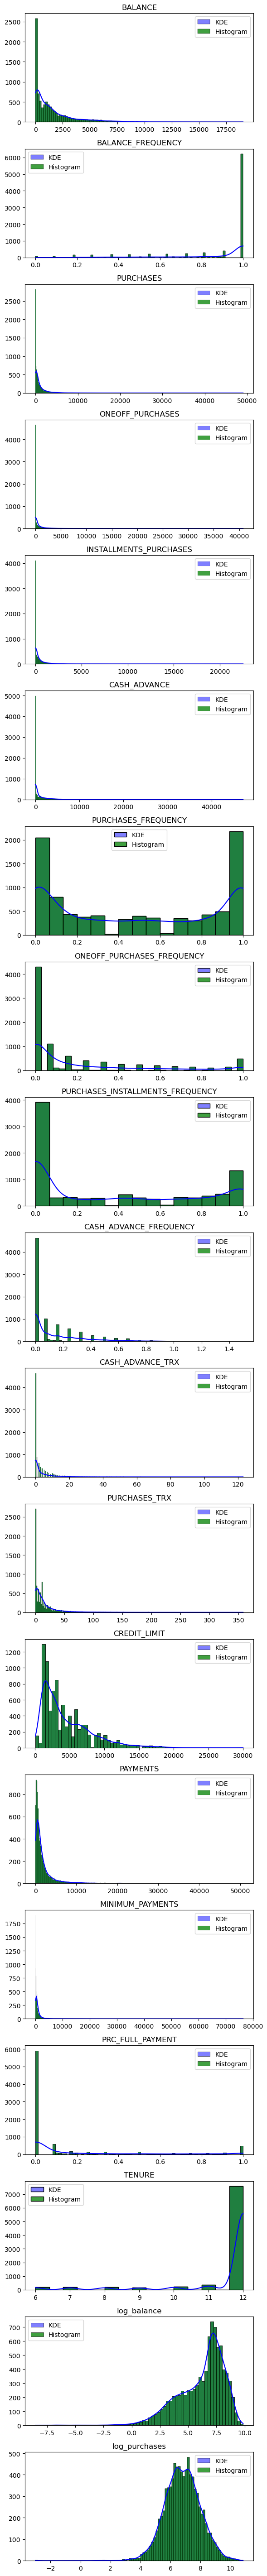

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(len(df.columns), 1, figsize=(6, 3*len(df.columns)))

# Iterar sobre las columnas del DataFrame
for i, col in enumerate(df.columns):
    ax = axs[i]

    sns.histplot(df[col], kde=True, color="b", label="KDE", ax=ax)
    sns.histplot(df[col], kde=False, color="g", label="Histogram", ax=ax)

    ax.set_title(col)
    ax.set_xlabel("")
    ax.set_ylabel("")
   
    ax.legend()

plt.tight_layout()
plt.show()

In [198]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'log_balance', 'log_purchases'],
      dtype='object')

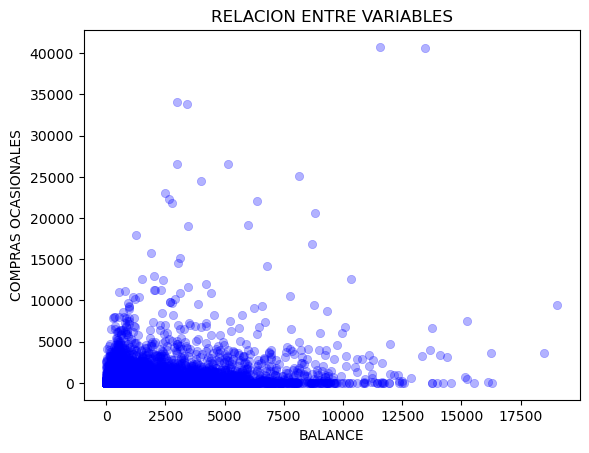

In [21]:
# Relaciones entre variables
sns.scatterplot(x = 'BALANCE', y = 'ONEOFF_PURCHASES', data=df,
               color = 'blue', edgecolor = 'blue',
               alpha = 0.3)
plt.xlabel('BALANCE')
plt.ylabel('COMPRAS OCASIONALES')
plt.title('RELACION ENTRE VARIABLES')
plt.show()

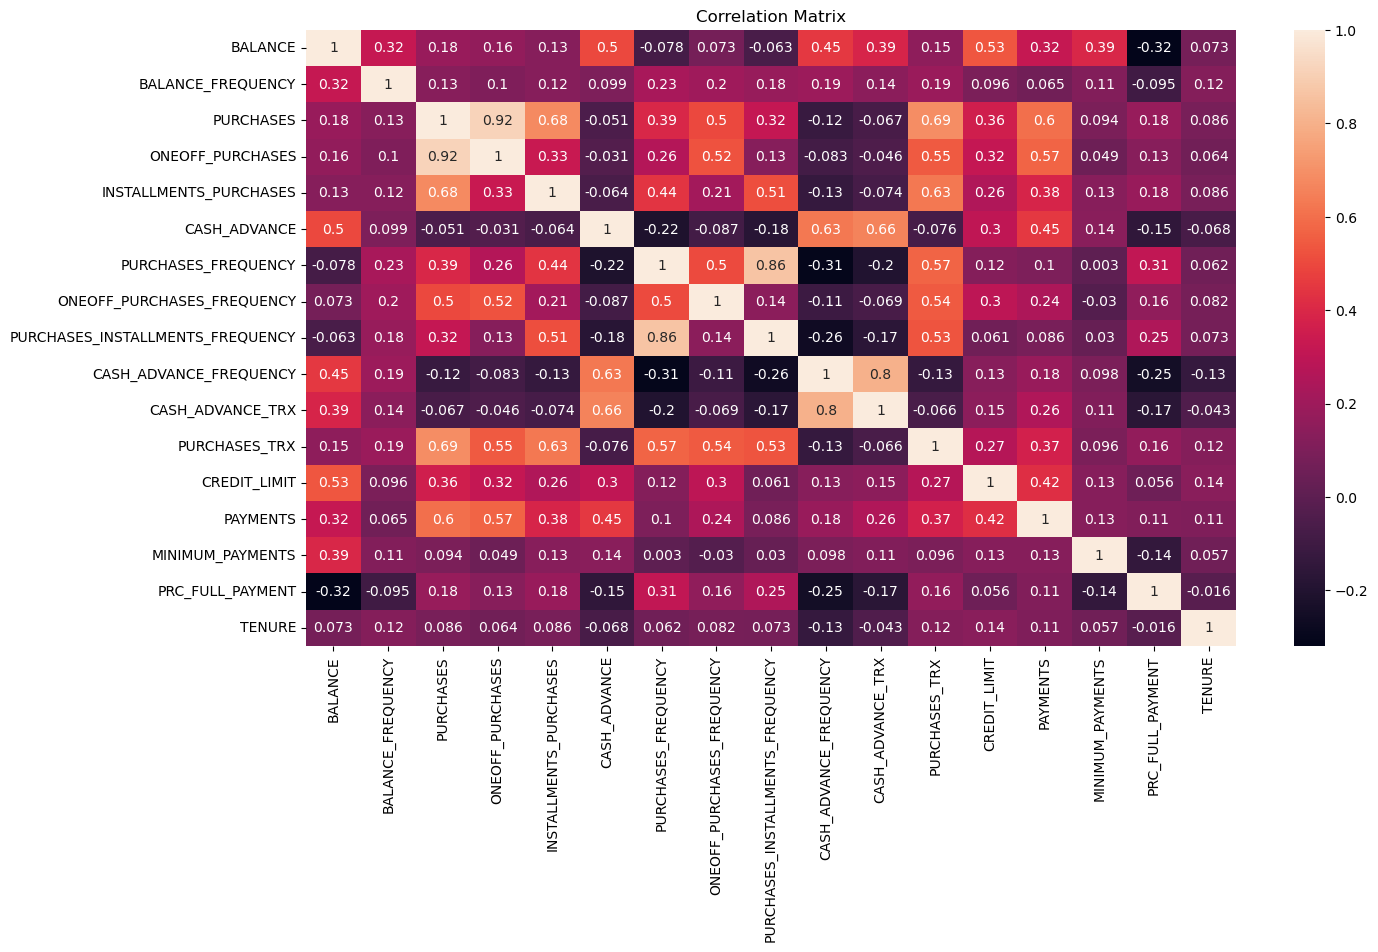

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Hay varias variables con alta correlacion

por ejemplo: Purchases frequency y Purchasess installments, es decir, los clientes compran mas a menudo cuando pagan a plazos.

Las 'COMPRAS' tienen una alta correlación entre las compras puntuales(ONEOFF), las compras a plazos(intsallments), las operaciones de compra, el límite de crédito y los pagos.

Correlación positiva fuerte entre 'COMPRA_FRECUENTE' y 'COMPRAS A PLAZOS'

In [201]:
# Valores atípicos y distribucion con boxplots
# for column in df.columns:
  #  sns.boxplot(x=df[column])
  #  plt.xlabel(column)
  #  plt.title(f'Boxplot of {column}')
  #  plt.show()

In [202]:
# Demasiados Outliers
# SI los Eliminamos perderiamos informacion valiosa.

#### Análisis de correlación entre las dos variables transformadas a logaritmo
correlation_matrix_transformed = df[['log_balance', 'log_purchases']].corr()
sns.heatmap(correlation_matrix_transformed, annot=True)
plt.title('Correlation Matrix (Logaritmos de variables)')
plt.show()


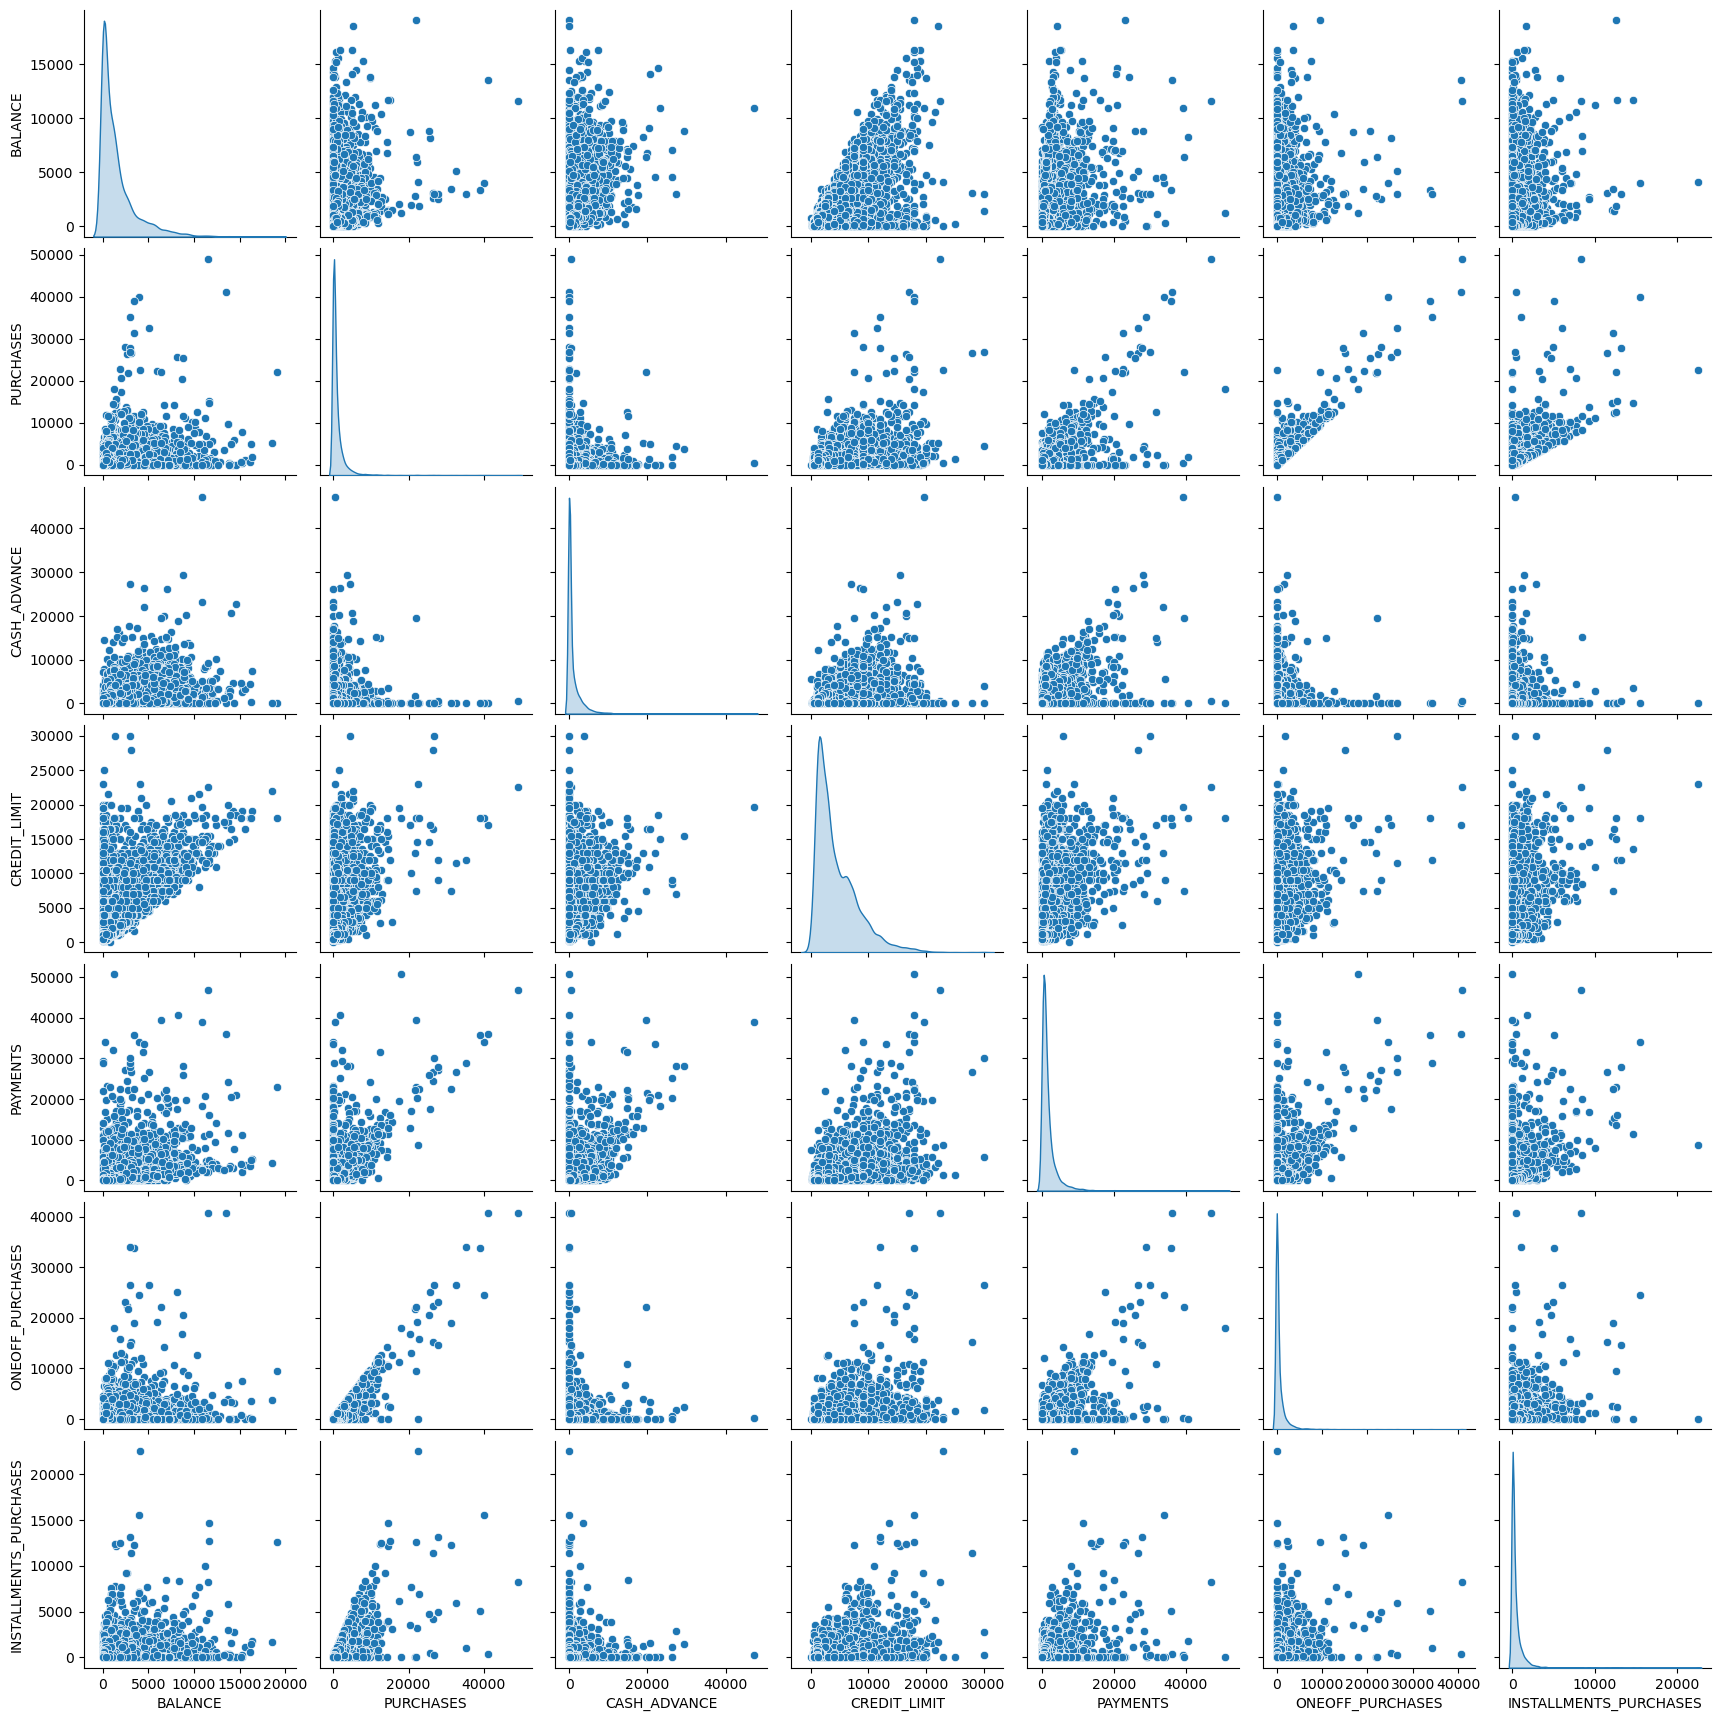

In [203]:
subset = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']
sns.pairplot(df[subset], diag_kind = 'kde')
plt.show()
# Correlación entre 'PURCHASES' y ONEOFF_PURCHASES & INSTALMENT_PURCHASES
# Tendencia entre 'PURCHASES' y 'CREDIT_LIMIT' & 'PAYMENTS'


Lo que he hecho hasta ahora, es analizar un poco los datos, hemos encontrado cierta informacion acerca del comportamiento de los clientes pero, necesitamos tener mas informacion mas precisa, por lo que el enfoque que se utiliza en este caso es el de agrupar clientes mediante Clustering, para identificar patrones mas acertados y enfocar campañas hacia ellos y en definitiva **ver cuales son los clientes mas similares.


## TEORÍA Y ENFOQUE CLUSTERING, Kmeans, DBSCAN:

El agrupamiento o clustering es una técnica de aprendizaje no supervisado que trata de identificar datos similares entre sí y asignarlos a grupos lo más diferentes posible entre sí. En clustering no sabemos de antemanos que respuesta o que grupos podemos formar, la menos no, de manera muy clara.

En clustering no existe, como tal, una solución correcta. Imagina que tienes una serie de datos que representas como un conjunto de puntos en un espacio bidimensional

K-means es un algoritmo de agrupacion para que utiliza la media euclidiana para unir puntos y cluster que considera cercanos, LOS PASOS SON:

el numero de K inicial son los centroides que se seleccionan de manera aleatoria para formar clusteres, acercando cada punto de datos a su centro mas cercano, vuelve a calcular los centroides y repite hasta llegar a la convergencia.

Uno de los problemas principales en K-means es cuando no conocemos el Número de clústeres

Seleccionar una cantidad de clústeres es la parte más desafiante de configurar K-means. No existen criterios matemáticos estrictos para esto y se han desarrollado muchos enfoques heurísticos/simplificados. Uno de los más simples y populares es el método del codo que se muestra en este análisis. Además, también se utilizará una puntuación de silueta. También hay otras opciones, a menudo avanzadas, para elegir la cantidad óptima de clústeres (sin embargo, no se usan en este cuaderno y no se implementan en sklearn), por ejemplo:

**Algunas conclusiones sobre K-Means:**

Para agrupar solo se utilizan columnas numéricas.
Se utilizan distancias euclidianas.
El número de grupos tiene que ser definido para el algoritmo.
El centroide se calcula utilizando la distancia media a los miembros del clúster
Los grupos se suponen isotrópicos y convexos.
Algoritmo estocástico: los resultados dependen de los criterios de inicialización
Crea grupos de igual varianza (minimiza la inercia)
Propenso a la "maldición de la dimensionalidad"
Se puede ejecutar en paralelo, por lo que se escala bien

https://select-statistics.co.uk/blog/customer-segmentation/

# Escalado y escoger el numero optimo de clústeres

Pero en distintos problemas, como este, como podemos saber cual es el numero acertado de clusteres, pues hay varios enfoques para ello:

Elbow method 
Silhoute method.

- El método del codo (ELBOW) es un método heurístico de interpretación y validación de consistencia dentro del análisis de clusteres diseñado para ayudar a encontrar el número apropiado de grupos en un conjunto de datos.
- Si el gráfico de líneas parece un brazo, entonces el "codo" del brazo es el valor de k que es el mejor (en teoría).

    - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
    - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/


In [27]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [28]:
X = df.copy()

In [ ]:
# X.drop(['log_balance', 'log_purchases'], axis=1, inplace=True)

In [31]:
# Aplicaremos escalado a los datos para que k-means sea mas efectivo al calcular la distancia euclididana
# K-means es sensible a las escalas muy diversas en las variables.

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

- Tenemos dos sets de datos: 1 escalado (scaled_df) y otros sin escalado (X, df). buscaremos cual de los dos nos da mejores resultados al aplicar K-means y las comporbaciones de elbow method.

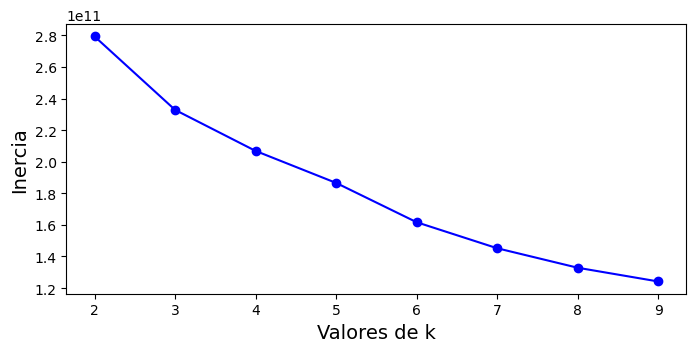

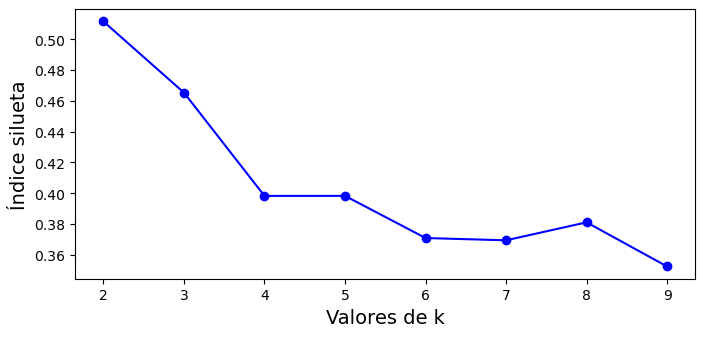

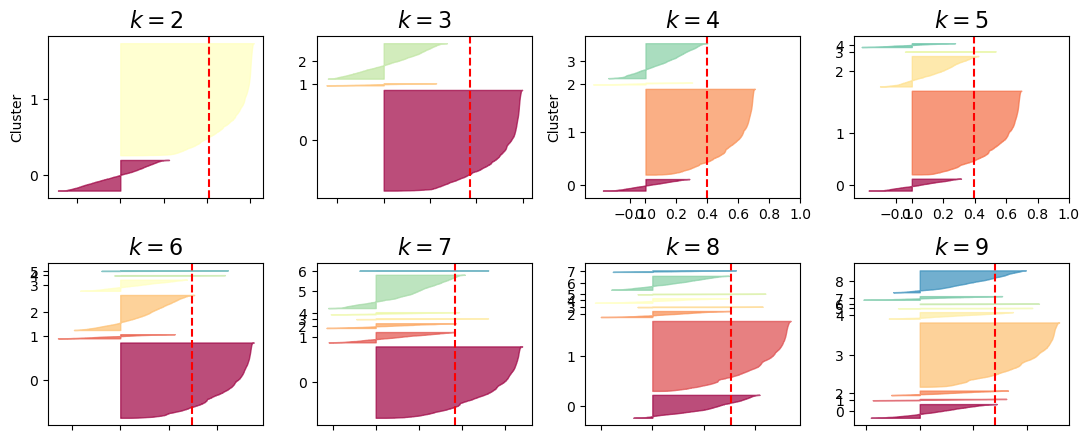

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

# Obtener los datos del DataFrame scaled_df

k_values = range(2, 10)
models = [KMeans(n_clusters = k, random_state = 1,
                 n_init = 10).fit(X) 
          for k in k_values]

# Calculamos las inercias y los índices silueta
inertias = [model.inertia_ for model in models]
silhouettes = [silhouette_score(X, model.labels_) for model in models]

# Dibujamos la gráfica de inercias
plt.figure(figsize=(8, 3.5))
plt.plot(k_values, inertias, "bo-")
plt.xlabel("Valores de k", fontsize=14)
plt.ylabel("Inercia", fontsize=14)

# Dibujamos la gráfica de índices silueta
plt.figure(figsize=(8, 3.5))
plt.plot(k_values, silhouettes, "bo-")
plt.xlabel("Valores de k", fontsize=14)
plt.ylabel("Índice silueta", fontsize=14)

# Representación gráfica del coeficiente de silueta
plt.figure(figsize=(11, 9))
for i, k in enumerate(k_values):
    plt.subplot(4, 4, i + 1)
    model = models[i]
    y_pred = model.labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []
    for j in range(k):
        coeffs = silhouette_coefficients[y_pred == j]
        coeffs.sort()
        color = plt.cm.Spectral(j / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouettes[i], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()



In [41]:
# Es interesante que el dataset sin escalar, me de mejores resultados de indice de silueta que el escalado.

from sklearn.metrics import silhouette_score
print(silhouette_score(X, model.labels_))

0.3524008026896348


In [60]:
# Aplicaremos PCA a los datos que hemos escalado para ver si obtenemos mejores resultados, reduciendo la dimensionalidad
# Generamos un nuevo dataframe con 3 componentes principales a partir de el df_scaled llamado df_pca
# Instanciamos un objeto pca con 2 componentes principales.
pca = PCA(n_components = 2)
df_pca  = pca.fit_transform(scaled_df)
df_pca.shape

(8950, 2)

In [110]:
component_names = ['Componente Principal 1', 'Componente Principal 2']

df_pca = pd.DataFrame(df_pca, columns=component_names)

print(df_pca.shape)

(8950, 2)


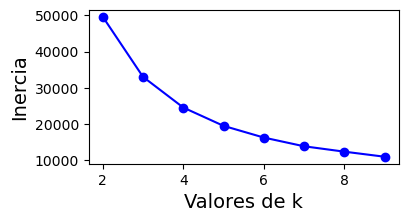

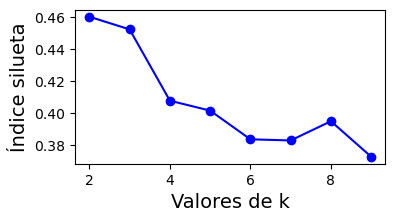

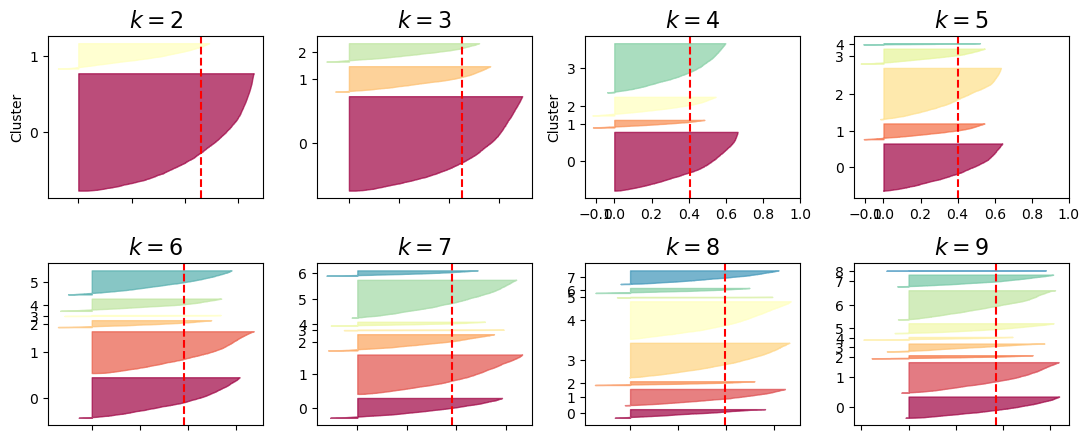

In [208]:
k_values = range(2, 10)
models = [KMeans(n_clusters = k, random_state = 1,
                 n_init = 10, init = 'k-means++').fit(df_pca) 
          for k in k_values]

# Calculamos las inercias y los índices silueta
inertias = [model.inertia_ for model in models]
silhouettes = [silhouette_score(df_pca, model.labels_) for model in models]

# Dibujamos la gráfica de inercias
plt.figure(figsize=(4, 2))
plt.plot(k_values, inertias, "bo-")
plt.xlabel("Valores de k", fontsize = 14)
plt.ylabel("Inercia", fontsize = 14 )

# Dibujamos la gráfica de índices silueta
plt.figure(figsize = (4, 2))
plt.plot(k_values, silhouettes, "bo-")
plt.xlabel("Valores de k", fontsize = 14)
plt.ylabel("Índice silueta", fontsize = 14)

# Representación gráfica del coeficiente de silueta
plt.figure(figsize = (11, 9))
for i, k in enumerate(k_values):
    plt.subplot(4, 4, i + 1)
    model = models[i]
    y_pred = model.labels_
    silhouette_coefficients = silhouette_samples(df_pca, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []
    for j in range(k):
        coeffs = silhouette_coefficients[y_pred == j]
        coeffs.sort()
        color = plt.cm.Spectral(j / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
    else:
        plt.tick_params(labelbottom=False)
    plt.axvline(x=silhouettes[i], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.tight_layout()
plt.show()

**Parece ser que las siluetas mas homogenes son las que obtenemos con K = 3  en el metodo del codo tambien podriamos considerar un rango entre 3 y 5**

In [258]:
modelo = KMeans(n_clusters = 3, random_state=1, n_init = 10, init = 'k-means++')
modelo.fit(df_pca)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [259]:
print(silhouette_score(df_pca, modelo.labels_))

0.45233268717775277


In [ ]:
# df.drop(['log_balance', 'log_purchases'], axis=1, inplace=True)


In [291]:
etiq = modelo.labels_

In [70]:
components = pca.components_
feature_names = X.columns

for i, component in enumerate(components):
    print(f"Componente principal {i+1}:")
    for j, feature in enumerate(feature_names):
        print(f"    {feature}: {component[j]}")

Componente principal 1:
    BALANCE: 0.10107781184752768
    BALANCE_FREQUENCY: 0.12004330745672105
    PURCHASES: 0.41164159162601216
    ONEOFF_PURCHASES: 0.34640699160068494
    INSTALLMENTS_PURCHASES: 0.3368144673273892
    CASH_ADVANCE: -0.023343323159965783
    PURCHASES_FREQUENCY: 0.3214929649507846
    ONEOFF_PURCHASES_FREQUENCY: 0.2946333534640009
    PURCHASES_INSTALLMENTS_FREQUENCY: 0.2747097210996572
    CASH_ADVANCE_FREQUENCY: -0.08913902161920498
    CASH_ADVANCE_TRX: -0.048653942207157734
    PURCHASES_TRX: 0.3906949208203891
    CREDIT_LIMIT: 0.21166270647516977
    PAYMENTS: 0.2662490298927639
    MINIMUM_PAYMENTS: 0.06035119854546749
    PRC_FULL_PAYMENT: 0.1321123621117664
    TENURE: 0.08102053423902228
Componente principal 2:
    BALANCE: 0.40395830590109455
    BALANCE_FREQUENCY: 0.13053667809829503
    PURCHASES: 0.04103798009181934
    ONEOFF_PURCHASES: 0.06287178016116486
    INSTALLMENTS_PURCHASES: -0.018532349600368654
    CASH_ADVANCE: 0.4392413134956244
   

In [80]:
dfpca = pd.DataFrame(data = df_pca, columns =['pca1','pca2'])

dfpca.head()

,pca1,pca2
0,-1.682221,-1.076453
1,-1.138299,2.506469
2,0.969693,-0.383501
3,-0.873631,0.043159
4,-1.599434,-0.688580


In [163]:
from sklearn.cluster import KMeans
modelo2 = KMeans(n_clusters = 3, n_init = 10, init = 'k-means++')
modelo2.fit(dfpca)
labels = modelo2.labels_

In [279]:
y_pred = modelo2.fit_predict(scaled_df)

In [280]:
cluster_pred = pd.concat([X, pd.DataFrame({'cluster':labels})], axis = 1)
cluster_pred.head(10)

array([1, 0, 1, ..., 1, 1, 1])

In [164]:
print(silhouette_score(dfpca, modelo2.labels_))

0.4985153380651707


In [210]:
dfpca = pd.concat([dfpca, pd.DataFrame({'cluster':labels})], axis = 1)
dfpca.head()

,pca1,pca2,cluster,cluster,cluster
0,-1.682221,-1.076453,2,1,1
1,-1.138299,2.506469,1,2,0
2,0.969693,-0.383501,2,1,3
3,-0.873631,0.043159,2,1,1
4,-1.599434,-0.688580,2,1,1


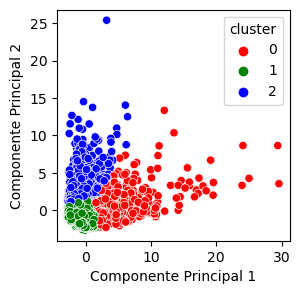

In [290]:
plt.figure(figsize=(3,3))
ax = sns.scatterplot(x = "Componente Principal 1", y = "Componente Principal 2", hue = "cluster",
                     data = df_pca, palette =['red','green','blue'])
plt.show()

In [287]:
KM_clust_sizes = df_pca.groupby('cluster').size().to_frame()
KM_clust_sizes.columns = ["Cluster_size"]
KM_clust_sizes

,Cluster_size
cluster,
0,1191
1,6114
2,1645


In [88]:
dfpca.shape

(8950, 3)

In [90]:
from sklearn.metrics import silhouette_score
print(silhouette_score(dfpca, labels))

0.4985153380651707


¿Cuál de estas opciones es la mejor? En base a lo expuesto anteriormente, resulta posible que pienses en que deberíamos elegir aquella en la que la inercia es más baja. Parece una idea razonable, dado que así estaríamos «premiando» la agrupación que redujera la distancia de cada instancia a su centroide, por lo que los elementos de cada clúster estarían más próximos entre sí.

1. ) Empleo de la inercia.
2. ) Uso del índice silueta.

Empleo del índice silueta para fijar el número de clústeres
Un enfoque más interesante consiste en acudir al método de la silueta, que ya estudiaste en su momento. La librería Scikit-learn proporciona la función silhouette_score() para su cálculo. Solo tienes que indicar cuál es el dataset y cuál es el agrupamiento que ha generado el modelo, tal y como puedes apreciar en el siguiente código:

In [292]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df_pca, etiq))

0.4807654348180862


In [150]:
# Para entender lo que significan estos números, realicemos una transformación inversa
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers





,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.484418e+10,1.137889,7.257516e+09,2.737987e+09,4.879662e+08,9.408407e+09,0.774141,0.291123,0.570192,0.170688,295.141929,14091.002419,1.198079e+11,2.449706e+10,8.584146e+09,0.210074,47.947915
1,3.726837e+09,1.133051,2.775575e+09,8.698254e+08,2.395611e+08,2.189279e+09,0.762543,0.276643,0.564920,0.166465,130.473300,6999.449644,3.665675e+10,8.384829e+09,3.182942e+09,0.212118,47.411188
2,2.077032e+10,1.136186,4.951283e+10,2.108230e+10,2.612517e+09,2.256794e+10,0.808660,0.316279,0.605433,0.171149,452.858361,54012.136195,1.650863e+11,1.523040e+11,1.345983e+10,0.227508,48.130042


In [350]:
# concatenar las etiquetas de los clústeres a nuestro marco de datos original
# Segun las etiquetas de las labels de el modelo que hayamos entrenado obtendremos unos resultados u otros.
df_cluster = pd.concat([df, pd.DataFrame({'cluster':la_bels})], axis = 1)
df_cluster.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [352]:
df_pca

,Componente Principal 1,Componente Principal 2,cluster
0,-1.682221,-1.076453,1
1,-1.138299,2.506469,2
2,0.969693,-0.383501,1
3,-0.873631,0.043159,1
4,-1.599434,-0.688580,1
...,...,...,...
8945,-0.359629,-2.016144,1
8946,-0.564371,-1.639129,1
8947,-0.926204,-1.810786,1
8948,-2.336554,-0.657973,1


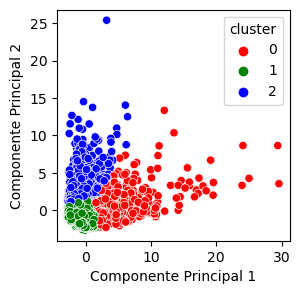

In [353]:
plt.figure(figsize=(3,3))
ax = sns.scatterplot(x = "Componente Principal 1", y = "Componente Principal 2", hue = "cluster",
                     data = df_pca, palette =['red','green','blue'])
plt.show()


In [351]:
# Agrupar el DataFrame por la columna 'cluster' y calcular estadísticas resumidas
cluster_summary = df_pca.groupby('cluster').agg({
    'BALANCE': ['mean', 'count'],
    'PURCHASES_FREQUENCY': ['mean'],
    'CASH_ADVANCE': ['mean'],
    'CASH_ADVANCE_FREQUENCY':['mean'],
    'CASH_ADVANCE_TRX' : ['mean'],
    'PAYMENTS': lambda x: (x.count() / df_cluster.shape[0]) * 100,
    'CREDIT_LIMIT': lambda x: x.quantile(0.95),
    'PURCHASES_INSTALLMENTS_FREQUENCY': ['mean'],
    'PRC_FULL_PAYMENT': lambda x: (x.count() / df_cluster.shape[0]) * 100,
})

# Renombrar las columnas en el DataFrame resumido
cluster_summary.columns = ['BALANCE Media', 'Tamaño del cluster',
                           'PURCHASES FREQUENCY Media',
                           'CAHS ADVANCE Media',
                           
                           'FRECUENCIA CASH ADVANCE media',
                           'CANTIDAD DE TRX DE CASH ADVANCE',
                           'PAYMENTS %',
                           'LIMITE DE CREDITO percentil 0.75',
                          'Media de compras a plazos',
                          'Pagos completos % ']

# Imprimir el DataFrame resumido
print(cluster_summary)


         BALANCE Media  Tamaño del cluster  PURCHASES FREQUENCY Media  \
cluster                                                                 
0           939.466396                5788                   0.530422   
1          5185.472523                 365                   0.679656   
2          2385.313099                2797                   0.382724   

         CAHS ADVANCE Media  FRECUENCIA CASH ADVANCE media  \
cluster                                                      
0                329.993936                       0.066086   
1               4770.098318                       0.375788   
2               1826.887976                       0.246648   

         CANTIDAD DE TRX DE CASH ADVANCE  PAYMENTS %  \
cluster                                                
0                               1.181410   64.670391   
1                              15.254795    4.078212   
2                               5.960315   31.251397   

         LIMITE DE CREDITO percentil 0.75 

**GRUPO CLUSTER (0), 5788 clientes:** (Transacciones): Son los clientes que pagan la menor cantidad de cargos de interés y son cuidadosos con su dinero, Grupo con la media de saldo más bajo ($ 939$) y adelanto de efectivo bajo ($ 329), Porcentaje de pagos = 64%

**GRUPO CLUSTER (1), 365 clientes:** que utilizan la tarjeta de crédito como préstamo: mayor saldo promedio($5000+$) y los que piden mayores adelantos de efectivo ($4700$), limite de credito 18000 sin embargo tienen una baja frecuencia de compra, alta frecuencia de adelanto de efectivo (0.37), alta transacción de adelanto de efectivo (15) y bajo porcentaje de pagos completos de (4%)

**GRUPO CLUSTER (2), 2797 clientes:**  (VIP/Prime): límite de crédito alto de $12.500$ y alto de pago total, a este sector de clientes se le podria aumentar el límite de crédito y aumentar los hábitos de gasto

# Análisis de Componentes Principales (PCA)
El Análisis de Componentes Principales (PCA) es un algoritmo de aprendizaje automático no supervisado utilizado para reducir la dimensionalidad de los datos sin alterar significativamente la información subyacente original.

El PCA funciona buscando un nuevo conjunto de características llamadas componentes que combinan las características de entrada y las convierta en correlacionadas. Estos componentes son combinaciones lineales de las características originales y se eligen de manera que capturen la mayor cantidad posible de la varianza de los datos.

Dependiendo de los datos y el objetivo del análisis, podemos seleccionar un número óptimo de componentes principales. En algunos casos, solo se necesitan 2 o 3 componentes para representar adecuadamente la variabilidad de los datos, mientras que en otros casos puede ser necesario utilizar más componentes para capturar una mayor proporción de la varianza.

El PCA es una técnica útil en varios escenarios, como la reducción de la dimensionalidad, la visualización de datos, la eliminación de características redundantes y la exploración de la estructura de los datos.

In [321]:
# Obtener los componentes principales de los datos scalados. 
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(scaled_df)
principal_comp

array([[-1.68221847, -1.07645204],
       [-1.13828919,  2.5064754 ],
       [ 0.96967461, -0.38351443],
       ...,
       [-0.92620377, -1.81078708],
       [-2.33655032, -0.65796828],
       [-0.55642728, -0.40046312]])

In [175]:
# Crear un dataframe con los dos componentes.
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076457
1,-1.138300,2.506455
2,0.969681,-0.383534
3,-0.873630,0.043157
4,-1.599434,-0.688584


In [176]:
Concatenar las etiquetas de los clústeres en el dataframe
dfpca = pd.concat([dfpca,pd.DataFrame({'cluster':labels})], axis = 1)
dfpca.head()

,pca1,pca2,cluster
0,-1.682221,-1.076457,1
1,-1.138300,2.506455,2
2,0.969681,-0.383534,1
3,-0.873630,0.043157,1
4,-1.599434,-0.688584,1


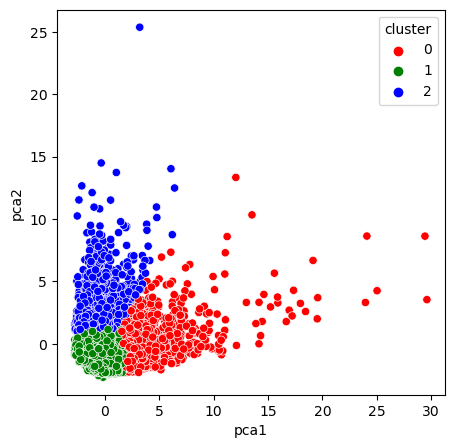

In [202]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster",
                     data = pca_df, palette =['red','green', 'blue'])
plt.show()

# Teoria detrás de los autoencoders.

Los modelos autoencoders son algoritmos de aprendizaje no supervisado que se utilizan para la reducción de la dimensionalidad y la reconstrucción de datos. Estos modelos están compuestos por una red neuronal que consta de una capa de entrada, una capa oculta y una capa de salida.

La idea principal detrás de los autoencoders es aprender una representación comprimida y más significativa de los datos de entrada en la capa oculta, esta capa latente contiene las características más importantes y relevantes de los datos originales.

El proceso de entrenamiento de un autoencoder se realiza en dos etapas:

Etapa de codificación (compresión): Los datos de entrada se pasan a través de la capa de entrada y se reduce su dimensionalidad en la capa oculta, que actúa como un codificador. Durante este proceso, el modelo aprende a extraer las características más importantes de los datos y a comprimirlas en una representación latente de dimensionalidad reducida.

Etapa de decodificación (reconstrucción): La representación latente se pasa a través de la capa de salida, que actúa como un decodificador, y se reconstruye una versión aproximada de los datos originales. El objetivo es minimizar la diferencia entre los datos de entrada y los datos reconstruidos

Esta representación reducida puede ser utilizada en diferentes tareas, como la visualización de datos, la detección de anomalías, la clasificación o el clustering.

Para aplicar un autoencoder para la reducción de la dimensionalidad, se entrena el modelo utilizando datos de entrada sin etiquetas y se ajustan los parámetros de la red neuronal para minimizar el error de reconstrucción.

# APLICAR AUTOENCODERS (REDUCIR DIMENSIONALIDAD UTILIZANDO AUTOENCODERS)

In [322]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 14

input_df = Input(shape = (17,))

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

# Capa densa donde seleccionamos el numero de caracteristicas que deseamos comprimidas, en este caso 3
encoded = Dense(3, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - utilizado para nuestra reducción de dimensiones
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


In [323]:
scaled_df.shape

(8950, 17)

In [324]:
autoencoder.fit(scaled_df, scaled_df, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 3s 30ms/step - loss: 0.5878
Epoch 2/25
70/70 [==============================] - 2s 31ms/step - loss: 0.3632
Epoch 3/25
70/70 [==============================] - 2s 31ms/step - loss: 0.2911
Epoch 4/25
70/70 [==============================] - 2s 31ms/step - loss: 0.2403
Epoch 5/25
70/70 [==============================] - 2s 31ms/step - loss: 0.2109
Epoch 6/25
70/70 [==============================] - 2s 32ms/step - loss: 0.2010
Epoch 7/25
70/70 [==============================] - 2s 31ms/step - loss: 0.1888
Epoch 8/25
70/70 [==============================] - 2s 31ms/step - loss: 0.1848
Epoch 9/25
70/70 [==============================] - 2s 31ms/step - loss: 0.1713
Epoch 10/25
70/70 [==============================] - 2s 31ms/step - loss: 0.1636
Epoch 11/25
70/70 [==============================] - 2s 32ms/step - loss: 0.1666
Epoch 12/25
70/70 [==============================] - 2s 31ms/step - loss: 0.1590
Epoch 13/25
70/70 [==================

In [180]:
autoencoder.save_weights('autoencoder.h5')

In [325]:
prediccicon = encoder.predict(scaled_df) # Encoder con salida de 3 caracteristicas

280/280 [==============================] - 1s 4ms/step


In [181]:
pred = encoder.predict(scaled_df) # Encoder con salida de 10 caracteristicas

280/280 [==============================] - 1s 5ms/step


In [182]:
pred.shape

(8950, 10)

In [327]:
prediccicon.shape

(8950, 3)

In [262]:
kmeans = KMeans(n_clusters = 3, n_init = 10, init = 'k-means++')
kmeans.fit(pred)
la_bels = kmeans.labels_
y_kmeans = kmeans.fit_predict(scaled_df)

In [328]:
kmeans.fit(prediccicon)

KMeans(n_clusters=3, n_init=10)

In [271]:
df_cluster_pred = pd.concat([X, pd.DataFrame({'cluster':la_bels})], axis = 1)
df_cluster_pred.tail(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8940,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6,0
8941,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6,2
8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6,0
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,2
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,2
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,2
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,2


In [270]:
# Clusters asignados a cada instancia, sin haber aplicado autoencoders. solo con escalado y PCA 2 COMPONENTS
df_cluster.tail(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8940,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6,0
8941,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6,2
8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6,0
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0


In [274]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(pred)
pca_pred = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_pred.head()

,pca1,pca2
0,-1.784228,-0.178212
1,1.474971,-1.336510
2,1.058171,0.513463
3,-0.599308,-0.301920
4,-1.723021,-0.265968


In [341]:
pca_pred = pd.concat([pca_pred,pd.DataFrame({'cluster':la_bels})], axis = 1)
pca_pred.tail()

,pca1,pca2,cluster,cluster
8945,-0.771659,-0.106438,0,0
8946,-0.504464,-0.401765,0,0
8947,-0.572171,-0.467365,0,0
8948,0.579226,-1.466672,2,2
8949,3.528934,-0.454921,2,2


In [331]:
pca = PCA(n_components = 2)
comps = pca.fit_transform(prediccicon)
predi_df = pd.DataFrame(data = comps, columns =['pca1','pca2'])

In [342]:
predi_df = pd.concat([predi_df,pd.DataFrame({'cluster':la_bels})], axis = 1)
predi_df.tail()

,pca1,pca2,cluster,cluster
8945,8.316627,-3.061558,0,0
8946,7.366934,-1.607422,0,0
8947,6.612887,-1.572297,0,0
8948,5.502393,0.224417,2,2
8949,5.750350,-0.115398,2,2


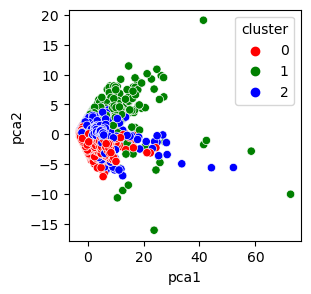

In [334]:
plt.figure(figsize=(3,3))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster",
                     data = predi_df, palette =['red','green','blue'])
plt.show()

Podemos ver que aplicando autoencoders para reducir dimensionalidad y analisis de componentes principales, ha creado 3 clusters 

In [335]:
KM_clust_sizes = predi_df.groupby('cluster').size().to_frame()
KM_clust_sizes.columns = ["Cluster_size"]
KM_clust_sizes

,Cluster_size
cluster,
0,5788
1,365
2,2797


In [223]:
KM_clust_sizes = pca_df.groupby('cluster').size().to_frame()
KM_clust_sizes.columns = ["Cluster_size"]
KM_clust_sizes

,Cluster_size
cluster,
0,1191
1,6114
2,1645


In [340]:
print(silhouette_score(dfpca, la_bels))

0.24542971552795584


In [256]:
#columnas = ['cluster']
#dfpca.drop(columnas, axis = 1)

,pca1,pca2
0,-1.682221,-1.076453
1,-1.138299,2.506469
2,0.969693,-0.383501
3,-0.873631,0.043159
4,-1.599434,-0.688580
...,...,...
8945,-0.359629,-2.016144
8946,-0.564371,-1.639129
8947,-0.926204,-1.810786
8948,-2.336554,-0.657973


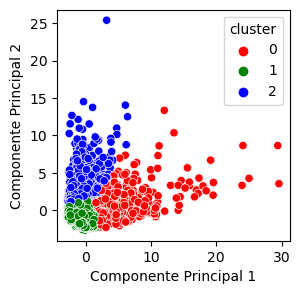

In [261]:
plt.figure(figsize=(3,3))
ax = sns.scatterplot(x="Componente Principal 1", y="Componente Principal 2",
                     hue = "cluster", data = df_pca, palette =['red','green', 'blue'])
plt.show()

In [260]:
df_pca = pd.concat([df_pca, pd.DataFrame({'cluster':labels})], axis = 1)
df_pca.head()

,Componente Principal 1,Componente Principal 2,cluster
0,-1.682221,-1.076453,1
1,-1.138299,2.506469,2
2,0.969693,-0.383501,1
3,-0.873631,0.043159,1
4,-1.599434,-0.688580,1


## Resumen:

En resumen, durante nuestro análisis, realizamos las siguientes acciones:

1. Visualización de datos: Iniciamos visualizando los datos para tener una comprensión inicial de su distribución y características.

2. Imputación de datos: Identificamos la presencia de algunos valores faltantes y los imputamos utilizando la media de los valores existentes en esas variables.

3. Manejo de valores atípicos: Observamos la existencia de varios valores atípicos en los datos. Aunque eran atípicos, podían proporcionarnos información relevante.

4. Determinación del número de clusters: Realizamos una investigación para determinar el número óptimo de clusters. Encontramos que el rango adecuado oscilaba entre 3 y 6 clusters. Considerando nuestro objetivo, decidimos dividir los datos en 3 clusters que representaran de manera más precisa la distribución de los datos.

5. Evaluación de la separación de clusters: Utilizamos el índice de silueta para evaluar la calidad de la separación entre los clusters obtenidos. Obtuvimos valores de silueta alrededor de 0.50, lo cual indica una separación relativamente buena entre los clusters.

6. Aplicación de Análisis de Componentes Principales (PCA): Utilizamos las técnicas de PCA con sklearn y autoencoders para reducir la dimensionalidad de los datos. Esto nos permitió obtener datos con una menor cantidad de dimensiones, lo cual facilita la representación y generalización de cada cluster mediante el algoritmo de clustering K-means.

7. Creacion de clusters con K-means: Despues de aplicar K-means creamos clusters, y los visualizamos, luego agregamos cada punto de los nuevos clusteres a los datos originales para indicar en un dataframe a que cluster pertenece cada registro y asi poder procesarlos posteriormente y entender cuales son las caracteristicas que identifican mejor cada cluster.

In [285]:
## Como experimento rapido, veamos el indice de silueta que nos proporciona un algoritmo de clustering aglomerativo
## Utilizando 3 clusters en el dataset escalado y aplicado PCA.


import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Construcción del modelo de clustering jerárquico aglomerativo
model = AgglomerativeClustering(n_clusters=3)  # Cambia el número de clusters según tus necesidades
labels1 = model.fit_predict(df_pca)

# Evaluación del clustering utilizando el coeficiente de silueta
silhouette_avg = silhouette_score(df_pca, labels1)
print(f"Coeficiente de silueta: {silhouette_avg}")

Coeficiente de silueta: 0.47034321707141147
